In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [6]:
# Перевод столбца "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None


Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
# Группировка данных по дате и подсчет количества продаж
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()



Вывести несколько первых строк сгруппированных данных

In [8]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

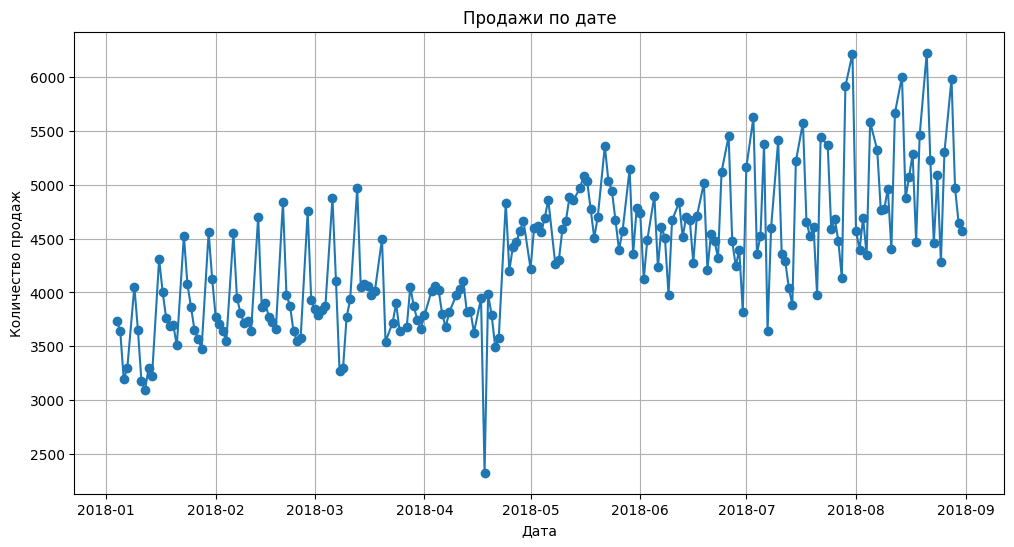

In [9]:
# Нарисуем график продаж
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-')
plt.title('Продажи по дате')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике продаж по дате представлена динамика изменения количества продаж в течение времени. На графике можно увидеть следующие особенности:

Январь-март: Наблюдается тенденция к росту количества продаж. В среднем количество продаж колеблется между 3100 и 5000.

Апрель: Количество продаж снижается до менее чем 2500, что может указывать на снижение спроса или другие внешние факторы.

Июль: Начинается период стабилизации и роста продаж, с колебаниями между 3600 и 6600.

Этот график позволяет легко увидеть общее количество продаж во времени и определить периоды с высоким или низким спросом.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
max_sales_row = df.loc[df['Количество'].idxmax()]
print("Строка с максимальным выбросом по количеству продаж:")
print(max_sales_row)


Строка с максимальным выбросом по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
# Фильтрация данных по складу 3 и летним месяцам (июнь, июль, август)
summer_df = df[(df['Склад'] == 3) & (df['Дата'].dt.month.isin([6, 7, 8]))]

# Фильтрация данных по средам
wednesday_df = summer_df[summer_df['Дата'].dt.dayofweek == 2]

# Поиск топового товара по продажам по средам
top_product = wednesday_df.groupby('Номенклатура')['Количество'].sum().idxmax()

print(top_product)


product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [16]:
import pandas as pd

# Read data from Excel file
file_path = 'fffff.xls'
df1 = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df1.head())


  Местное время в Астане     T     Po      P   Pa     U  \
0       31.12.2018 21:00 -17.2  744.3  779.6  0.6  86.0   
1       31.12.2018 18:00 -14.8  743.7  778.6  0.8  84.0   
2       31.12.2018 15:00 -11.2  742.9  777.3  0.5  76.0   
3       31.12.2018 12:00 -12.7  742.4  777.1  0.5  79.0   
4       31.12.2018 09:00 -14.0  741.9  776.7  1.2  81.0   

                                  DD   Ff  ff10  ff3  ... Unnamed: 19  \
0                Ветер, дующий с юга  1.0   NaN  NaN  ...         NaN   
1  Ветер, дующий с западо-юго-запада  1.0   NaN  NaN  ...         NaN   
2  Ветер, дующий с западо-юго-запада  2.0   NaN  NaN  ...         NaN   
3    Ветер, дующий с юго-юго-востока  2.0   NaN  NaN  ...         NaN   
4                Ветер, дующий с юга  2.0   NaN  NaN  ...         NaN   

  Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN   

In [17]:
# Предположим, что первая строка содержит заголовки
df1.columns = df1.iloc[0]
df1 = df1[1:]


In [18]:
# Переименование столбцов для удобства
df1.columns = ['Дата_время', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff'] + list(df1.columns[8:])

# Преобразование столбца 'Дата_время' в формат datetime
df1['Дата_время'] = pd.to_datetime(df1['Дата_время'], format='%d.%m.%Y %H:%M')

# Извлечение даты из 'Дата_время' и расчет средней температуры за день
df1['Дата'] = df1['Дата_время'].dt.date
daily_weather = df1.groupby('Дата')['T'].mean().reset_index()

# Переименование столбца для удобства
daily_weather.rename(columns={'T': 'Средняя_температура'}, inplace=True)

# Вывод первых нескольких строк для проверки
print(daily_weather.head())

         Дата  Средняя_температура
0  2018-01-01              -9.3250
1  2018-01-02              -9.7125
2  2018-01-03             -11.0000
3  2018-01-04             -13.0875
4  2018-01-05             -17.2500


In [19]:
# Предполагаем, что grouped_df содержит столбцы 'Дата' и 'Количество продаж'
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

# Объединение данных о продажах с данными о погоде
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='left')

# Вывод объединенного DataFrame для проверки
print(merged_df.head())


         Дата  Количество  Средняя_температура
0  2018-01-04        3734             -13.0875
1  2018-01-05        3643             -17.2500
2  2018-01-06        3193             -14.1250
3  2018-01-07        3298             -12.3375
4  2018-01-09        4055              -7.3875


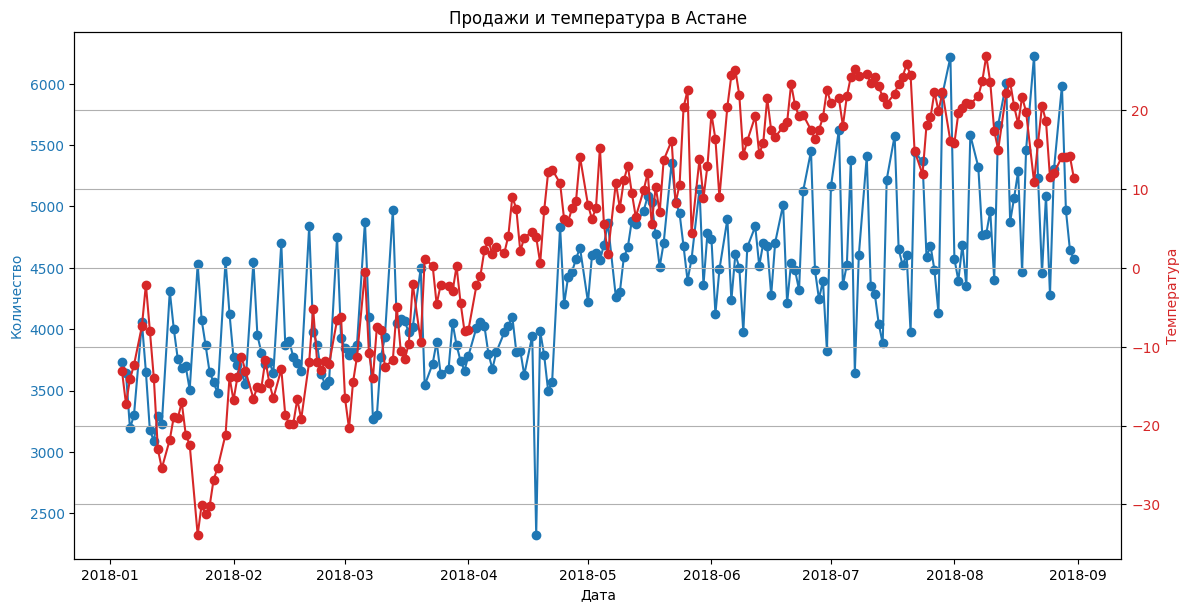

In [22]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, ax1 = plt.subplots(figsize=(12, 6))

# График продаж
color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество', color=color)
ax1.plot(merged_df['Дата'], merged_df['Количество'], marker='o', linestyle='-', color=color, label='Продажи')
ax1.tick_params(axis='y', labelcolor=color)

# Создание второго y-axes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Температура', color=color)
ax2.plot(merged_df['Дата'], merged_df['Средняя_температура'], marker='o', linestyle='-', color=color, label='Температура')
ax2.tick_params(axis='y', labelcolor=color)

# Добавление названия и сетки
fig.tight_layout()
plt.title('Продажи и температура в Астане')
plt.grid(True)
plt.show()


*Наблюдения*:

Зимние месяцы (январь-февраль): Количество продаж снижается, что может быть связано с более холодными погодными условиями.

Весенние месяцы (март-апрель): Наблюдается рост температуры и колебания в количестве продаж. В апреле количество продаж достигает минимума.

Летние месяцы (май-июнь): С увеличением температуры количество продаж растет, особенно заметный рост в июне.



*Выводы*:

Влияние температуры на продажи: Исследование показало, что средняя температура оказывает значительное влияние на количество продаж товаров. С увеличением температуры наблюдается рост числа продаж, особенно заметный в теплые месяцы года.

Сезонное планирование: Для успешного планирования маркетинговых и рекламных кампаний важно учитывать сезонные изменения температуры. Оптимизация предложения и ассортимента товаров в зависимости от климатических условий может помочь увеличить эффективность продаж и удовлетворить потребности потребителей в различные времена года.

Однако, для более точного вывода необходимо провести анализ за аналогичный период прошлых лет.